https://www.kaggle.com/nadintamer/top-spotify-tracks-of-2018

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [2]:
data = pd.read_csv('E:/Scrapped-Data/Top-Spotify-Tracks-2018/top2018.csv')

In [3]:
data.shape

(100, 16)

In [4]:
data.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


* id Spotify URI of the song
* name Name of the song
* artists Artist(s) of the song
* danceability Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* energy Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
* key The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
* loudness The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
* mode Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* speechiness Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* acousticness A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* instrumentalness Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* liveness Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* valence A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
* tempo The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* duration_ms The duration of the track in milliseconds.
* time_signature An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

**ARTISTS**

Artists with most songs in Top 100


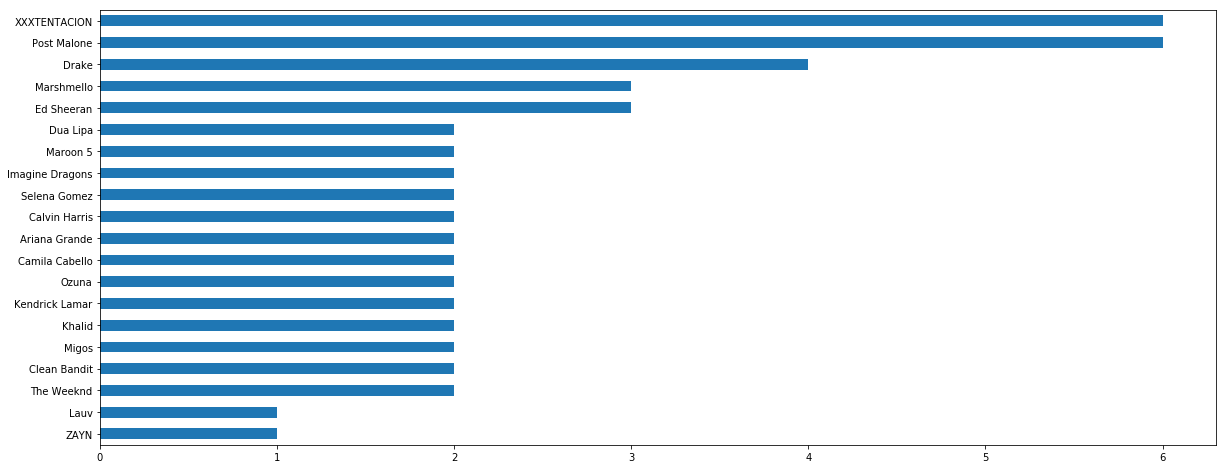

In [5]:
print('Artists with most songs in Top 100')
data['artists'].value_counts()[::-1].tail(20).plot.barh(figsize=(20,8))

**DANCEABILITY**

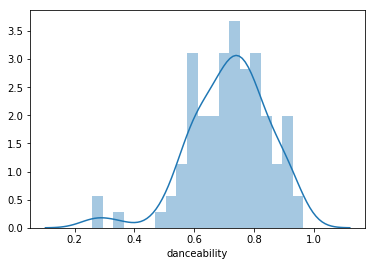

In [6]:
sns.distplot(data['danceability'], bins=20, kde=True)

In this graph we can see that most of the tracks are considered danceable from values higher than 0.5, but to make a better analysis we are going to divide them into 3 groups:
* Greater than 75% --- Highly danceable
* between 50% and 74% - Moderately danceable
* Minor 50% - Low danceable

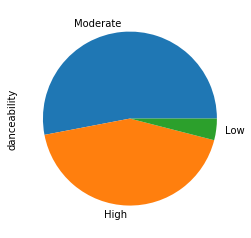

In [7]:
pd.cut(data['danceability'], bins=[0, 0.5, 0.75, 1], labels=['Low', 'Moderate', 'High']).value_counts().plot.pie()

In [8]:
print('Most Danceable Songs')
data.sort_values('danceability', ascending=False)[['name', 'danceability']].head().reset_index(drop=True)

Most Danceable Songs


,name,danceability
0,Yes Indeed,0.964
1,FEFE (feat. Nicki Minaj & Murda Beatz),0.931
2,Look Alive (feat. Drake),0.922
3,Moonlight,0.921
4,Nonstop,0.912


In [9]:
print('Least Danceable Songs')
data.sort_values('danceability', ascending=True)[['name', 'danceability']].head().reset_index(drop=True)

Least Danceable Songs


,name,danceability
0,Dusk Till Dawn - Radio Edit,0.258
1,This Is Me,0.284
2,lovely (with Khalid),0.351
3,Call Out My Name,0.489
4,Lucid Dreams,0.511


**ENERGY**

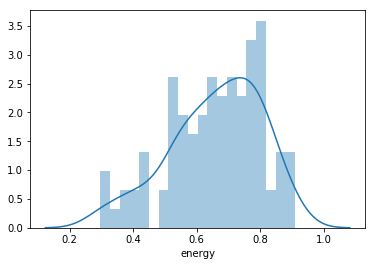

In [10]:
sns.distplot(data['energy'], bins=20, kde=True)

In this graph we can see that most of the tracks are considered energetic from values higher than 0.5, but to make a better analysis we are going to divide them into 3 groups:
* Greater than 75% --- Highly energetic
* between 50% and 74% - Moderately energetic
* Minor 50% - Low energetic

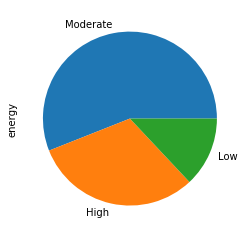

In [11]:
pd.cut(data['energy'], bins=[0, 0.5, 0.75, 1], labels=['Low', 'Moderate', 'High']).value_counts().plot.pie()

In [12]:
print('Most Energetic Songs')
data.sort_values('energy', ascending=False)[['name', 'energy']].head().reset_index(drop=True)

Most Energetic Songs


,name,energy
0,Nice For What,0.909
1,"1, 2, 3 (feat. Jason Derulo & De La Ghetto)",0.895
2,?chame La Culpa,0.889
3,FRIENDS,0.880
4,One Kiss (with Dua Lipa),0.862


In [13]:
print('Least Energetic Songs')
data.sort_values('energy', ascending=True)[['name', 'energy']].head().reset_index(drop=True)

Least Energetic Songs


,name,energy
0,lovely (with Khalid),0.296
1,Perfect Duet (Ed Sheeran & Beyonc?),0.299
2,changes,0.308
3,Yes Indeed,0.346
4,Too Good At Goodbyes,0.375


**KEY**

In [14]:
def keymap(x):
    mapping = {
        0:'C',
        1:'C#',
        2:'D',
        3:'D#',
        4:'E',
        5:'F',
        6:'F#',
        7:'G',
        8:'G#',
        9:'A',
        10:'A#',
        11:'B'
    }
    return mapping[x]

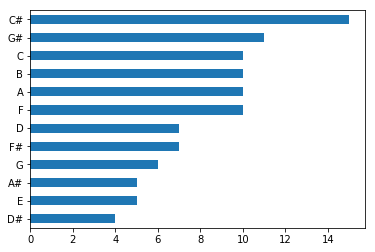

In [15]:
data['key'].apply(keymap).value_counts()[::-1].plot.barh()

**LOUDNESS**

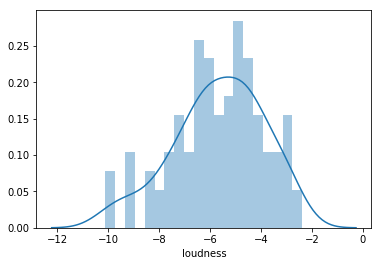

In [16]:
sns.distplot(data['loudness'], bins=20, kde=True)

To make a better analysis we are going to divide these into 3 groups:
* Greater than -4 --- Highly loud
* between -8 and -4 - Moderately loud
* Minor -8 - Less loud

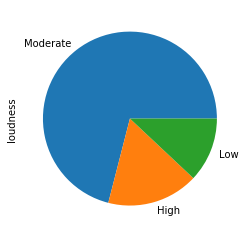

In [17]:
pd.cut(data['loudness'], bins=[-12, -8, -4, 0], labels=['Low', 'Moderate', 'High']).value_counts().plot.pie()

In [18]:
print(f'Most songs are generally {data["loudness"].median():.2f} decibals loud')

Most songs are generally -5.57 decibals loud


In [19]:
print('Most Loud Songs')
data.sort_values('loudness', ascending=True)[['name', 'loudness']].head().reset_index(drop=True)

Most Loud Songs


,name,loudness
0,lovely (with Khalid),-10.109
1,changes,-10.068
2,Fuck Love (feat. Trippie Redd),-9.740
3,Yes Indeed,-9.309
4,God's Plan,-9.211


In [20]:
print('Least Loud Songs')
data.sort_values('loudness', ascending=False)[['name', 'loudness']].head().reset_index(drop=True)

Least Loud Songs


,name,loudness
0,FRIENDS,-2.384
1,Happier,-2.749
2,Jackie Chan,-2.867
3,2002,-2.881
4,Criminal,-3.023


**TEMPO**

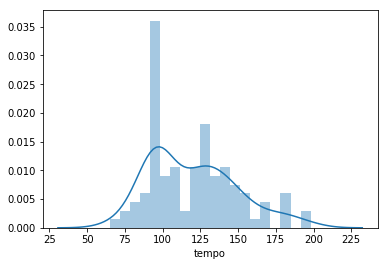

In [21]:
sns.distplot(data['tempo'], bins=20, kde=True)

What is the musical tempo?
___
At first the musical scores did not give us indications about the tempo or they were very scarce, so each interpreter performed it at ease, but the idea of the tempo begins to change from the eighteenth and nineteenth century, possibly as a consequence of the fact that composers will be tired of listening to interpretations of their works with completely arbitrary times. Then came a notation that expressed the "speed" or form that the works should be executed.

The 5 most usual ones were:

* Length: very slow (20 bpm)
* Adagio: slow and majestic (66 to 76 bpm)
* Andante: at the pace, quiet, a little vivacious (76 to 108 bpm)
* Allegro: animated and fast. (110 to 168 bpm).
* Presto: very fast (168 to 200 bpm).


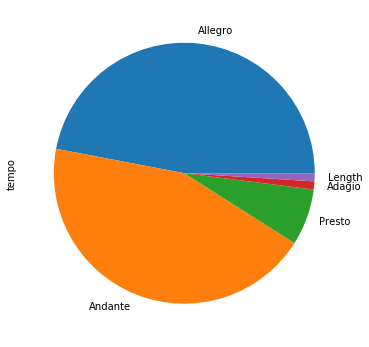

In [22]:
pd.cut(data['tempo'], 
       bins=[25, 66, 76, 108, 168, 225], 
       labels=['Length', 'Adagio', 'Andante', 'Allegro', 'Presto']).value_counts().plot.pie(figsize=(6,6))

**DURATION**

In [23]:
data['duration_min'] = data['duration_ms'].apply(lambda x: x/(60*1000))

In [24]:
print('Longest Song')
data.sort_values('duration_min', ascending=False)[['name', 'duration_min']].head(1).reset_index(drop=True)

Longest Song


,name,duration_min
0,Te Bot? - Remix,6.965333


In [25]:
print('Shortest Song')
data.sort_values('duration_min', ascending=True)[['name', 'duration_min']].head(1).reset_index(drop=True)

Shortest Song


,name,duration_min
0,Everybody Dies In Their Nightmares,1.591117


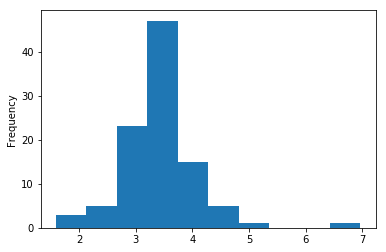

In [26]:
data['duration_min'].plot.hist()

In [27]:
print(f'Most songs are generally {data["duration_min"].median():.2f} mins long')

Most songs are generally 3.42 mins long


**CORRELATION**

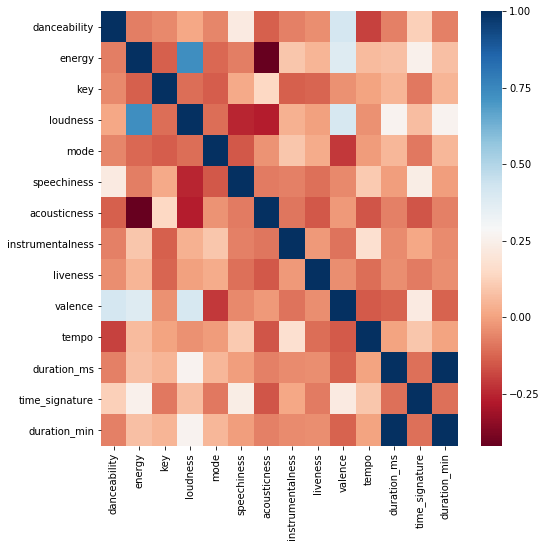

In [28]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data.corr(),cmap="RdBu", ax=ax)